In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
# Selecting columns of interest

columns = ["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", 
           "IN_TREINEIRO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "TP_LINGUA", 
           "NU_NOTA_REDACAO", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", 
           "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025"]

data = pd.read_csv("../dataset/raw_dataset.csv", sep = ";")
data = data[columns]
print(data.shape)
data.head()

(5095270, 40)


NU_IDADE SG_UF_RESIDENCIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0        21               PA       M                1            3   
1        16               PA       F                1            3   
2        18               PA       F                1            1   
3        23               PA       M                0            3   
4        23               PA       M                1            3   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  IN_TREINEIRO  NU_NOTA_CN  ...  \
0                1                3          1             0       472.9  ...   
1                3                0          1             1       358.9  ...   
2                2                0          3             0       574.2  ...   
3                2                0          2             0         NaN  ...   
4                1                5          1             0         NaN  ...   

   Q016  Q017  Q018  Q019  Q020 Q021 Q022 Q023 Q024  Q025  
0     A     A     A     C     B    A    D    A    B     A  
1     A     A     A     B     B    A    B    A    A     A  
2     B     A     A     D     B    B    D    A    C     B  
3     A     A     A     C     A    A    D    A    A     A  
4     A     A     A     B     A    A    D    A    A     A  

[5 rows x 40 columns]

### Treating NA values

In [3]:
def count_NA_values(df):
    flag = 0
    for col in df.columns:
        na_sum = df[col].isna().sum()
        if na_sum != 0:
            flag = 1
            print("NA values on column " + col + ": " + str(na_sum))
    if flag == 0:
        print("There isn't any NA value")
        
count_NA_values(data)

NA values on column NU_NOTA_CN: 1384837
NA values on column NU_NOTA_CH: 1172125
NA values on column NU_NOTA_LC: 1172125
NA values on column NU_NOTA_MT: 1384837
NA values on column NU_NOTA_REDACAO: 1172126


In [4]:
# NA values are probably due to absence. We will remove them.

data = data.dropna()
count_NA_values(data)
print(data.shape)

There isn't any NA value
(3702007, 40)


### Removing trainees

In [5]:
data = data[data["IN_TREINEIRO"] == 0]
data = data.drop("IN_TREINEIRO", 1) 
print(data.shape)

(3174308, 39)


### Checking target variable distribution

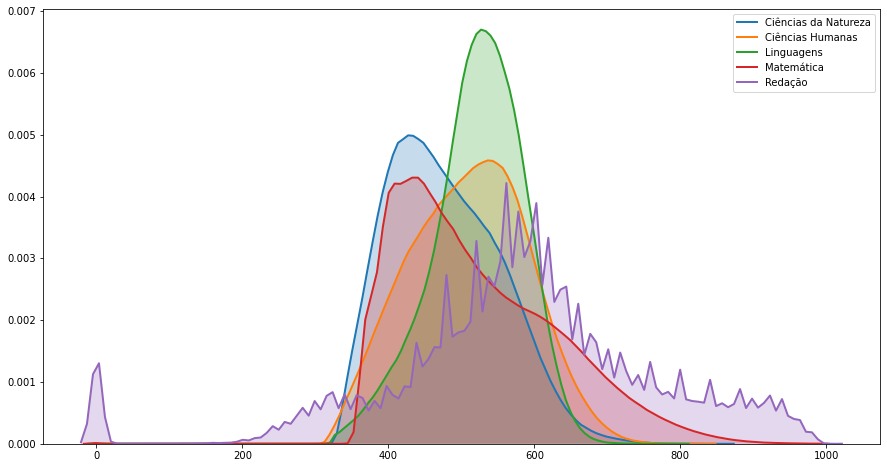

In [6]:
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
nomes = ["Ciências da Natureza", "Ciências Humanas", "Linguagens", "Matemática", "Redação"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(notas):
        sns.distplot(data[col], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = nomes[i])
plt.xlabel("")
plt.savefig("../pictures/Densidade_notas_por_disciplina.png")

### Removing outliers

In [7]:
for col in notas:
    data["z_score"]=stats.zscore(data[col])
    data = data.loc[data['z_score'].abs()<=3]
    data = data.drop("z_score", 1)

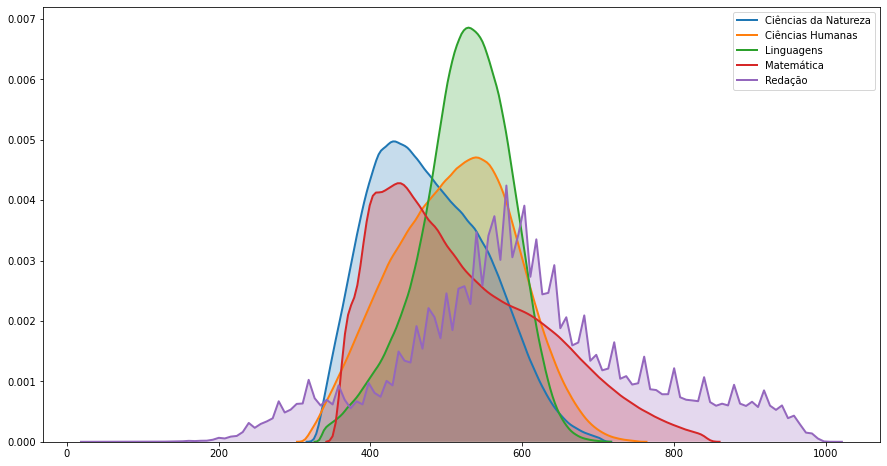

In [8]:
# Checking results

plt.figure(figsize=(15, 8))
for i, col in enumerate(notas):
        sns.distplot(data[col], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = nomes[i])
plt.xlabel("")
plt.savefig("../pictures/Densidade_notas_sem_outliers.png")

### Removing under age 15

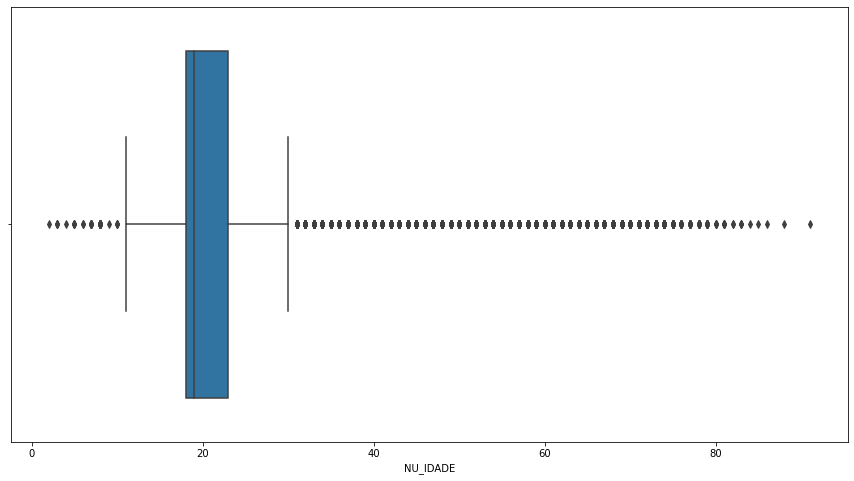

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = data["NU_IDADE"])

In [10]:
data = data[data["NU_IDADE"]>15]

### Plotting density plots

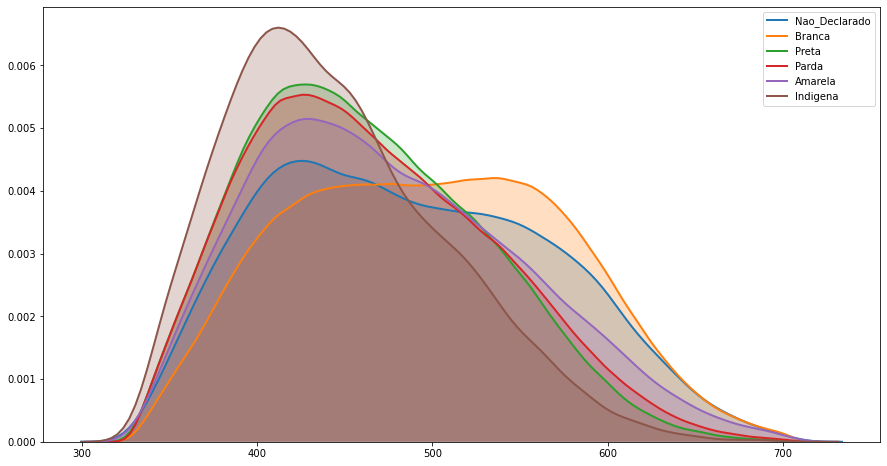

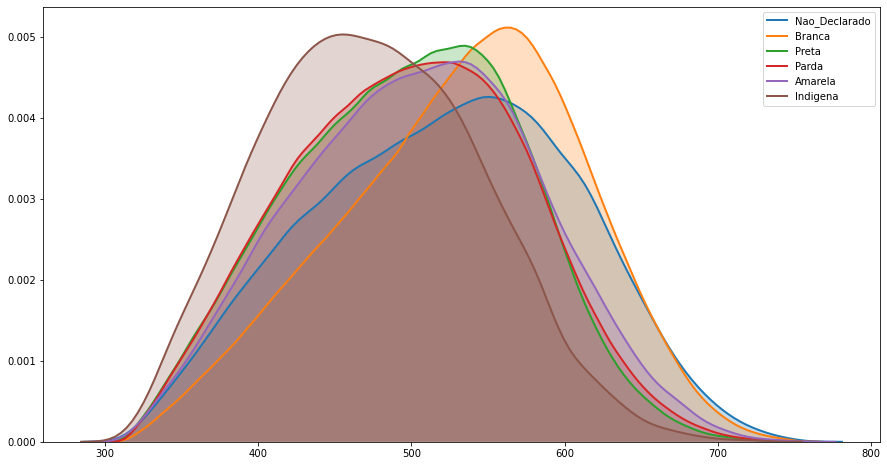

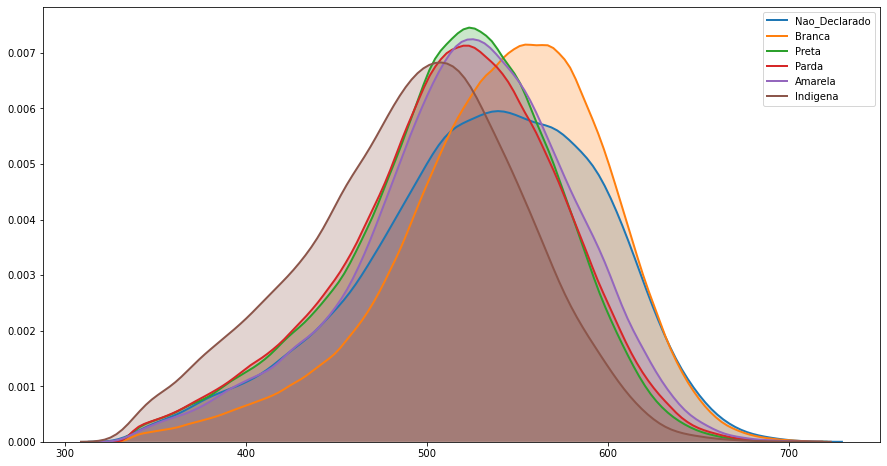

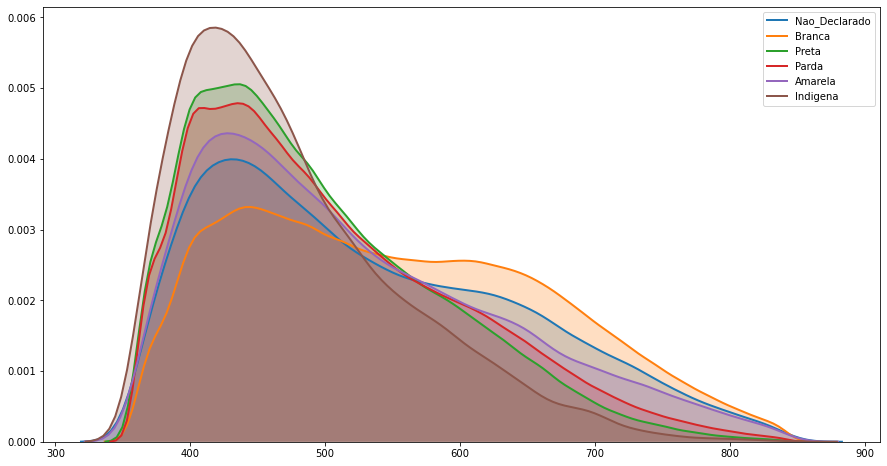

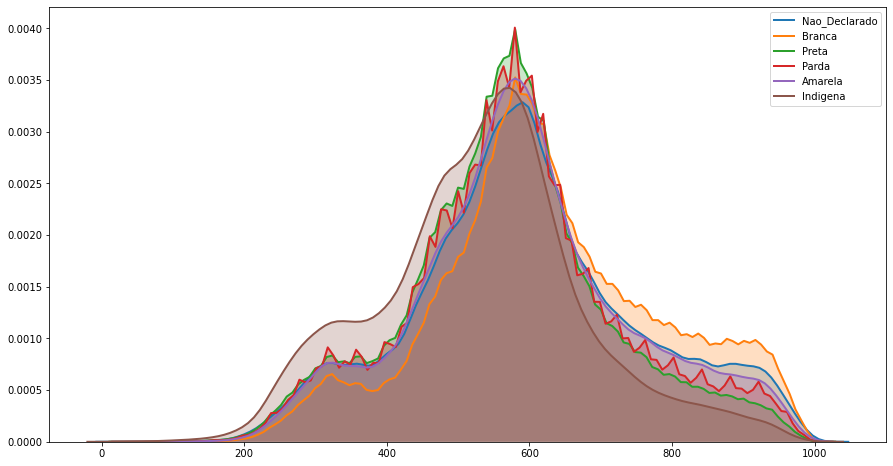

In [11]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i, label in enumerate(["Nao_Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena"]):
        subset = data[data['TP_COR_RACA'] == i]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = label)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_raca_"+col+".png")
        


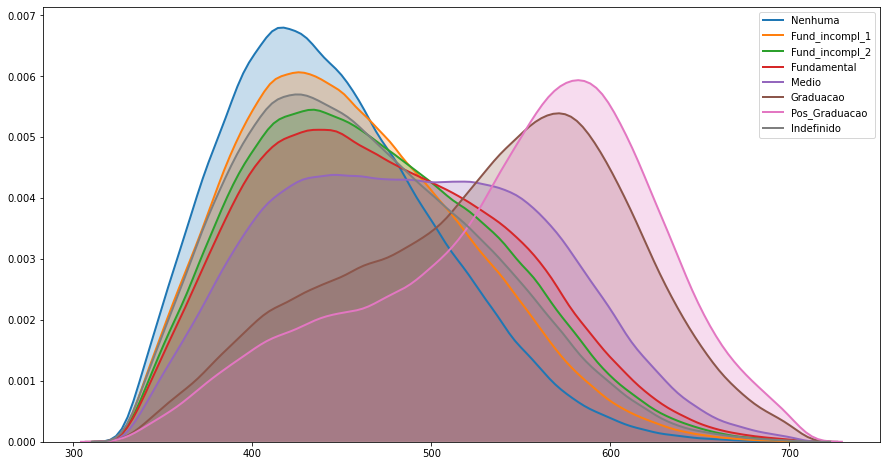

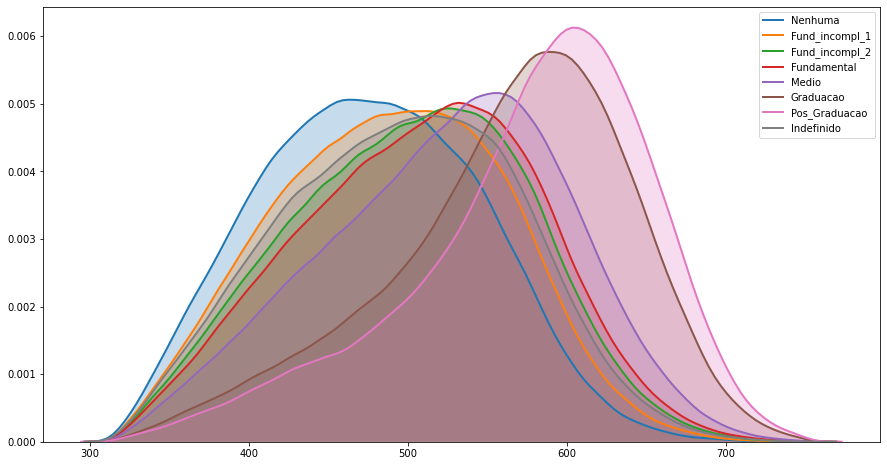

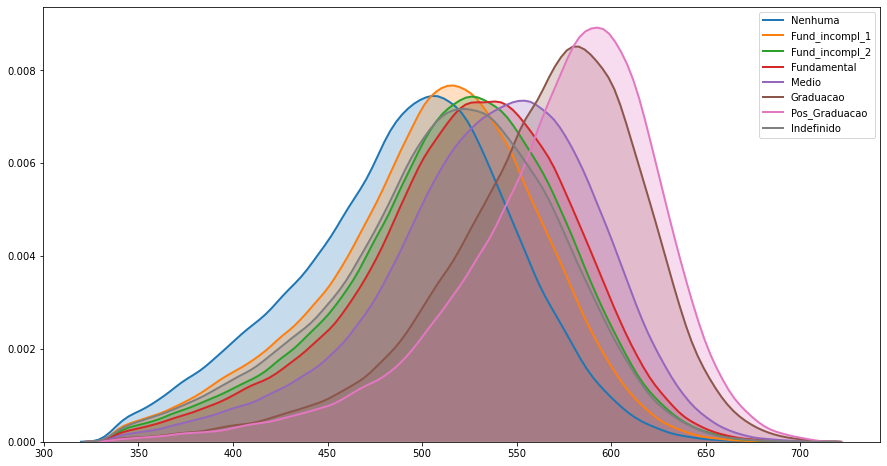

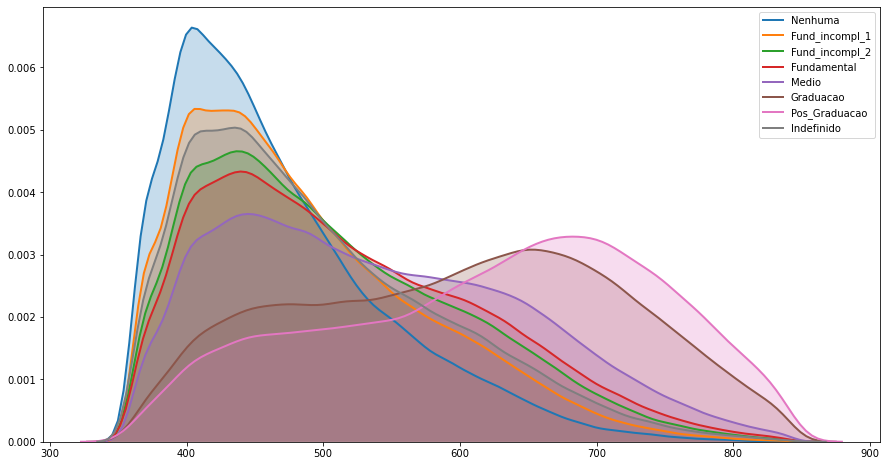

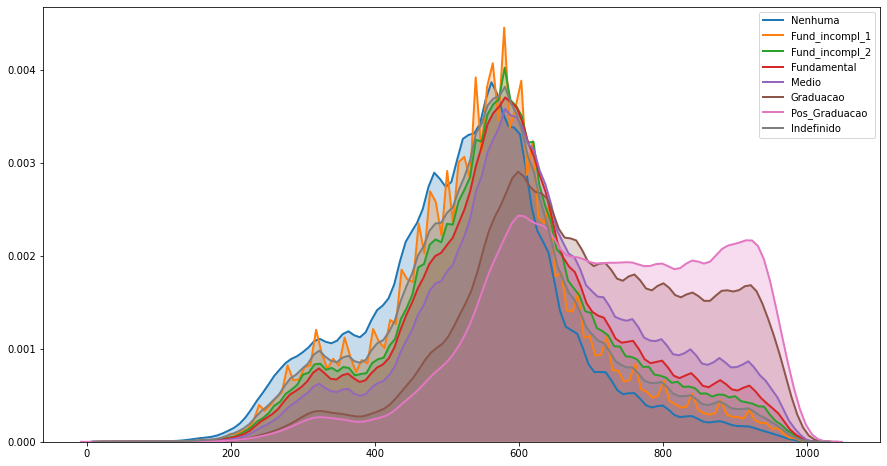

In [12]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i, label in enumerate(["Nenhuma", "Fund_incompl_1", "Fund_incompl_2", "Fundamental", "Medio", "Graduacao",
                               "Pos_Graduacao","Indefinido"]):
        subset = data[data['Q001'] == chr(65+i)]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = label)     
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_escolaridade_pai_"+col+".png")

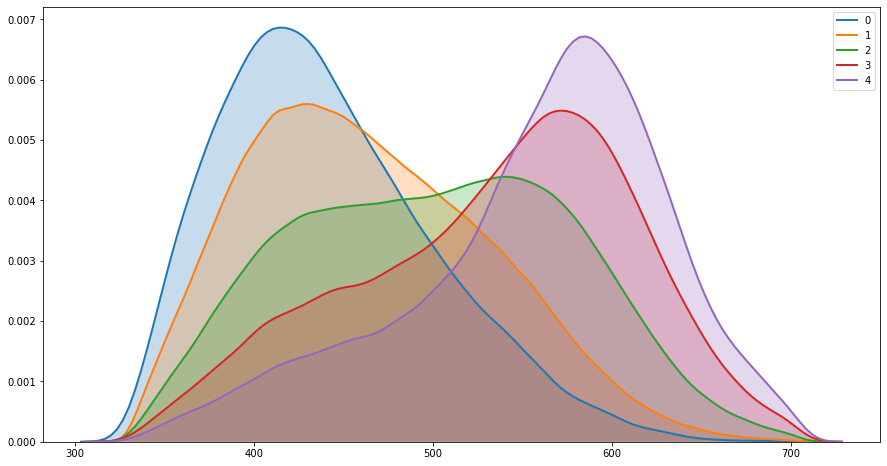

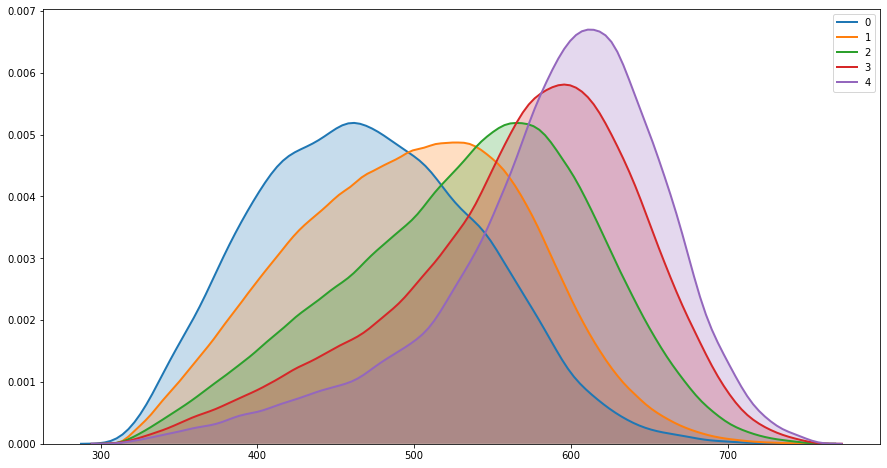

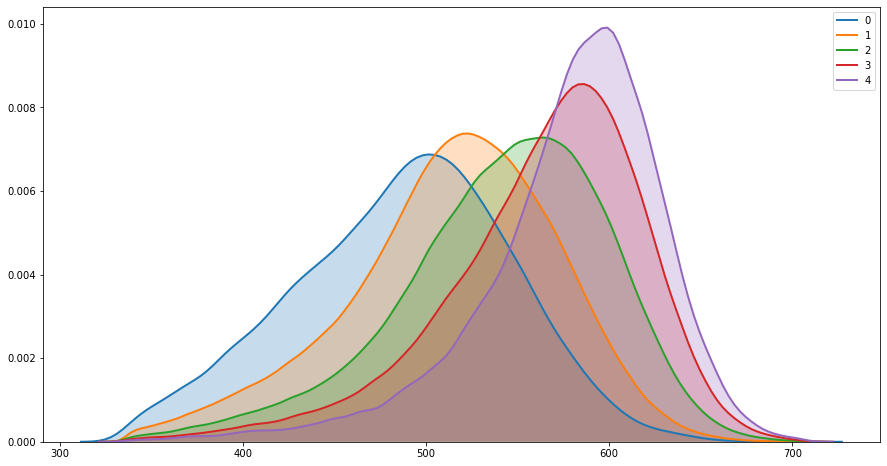

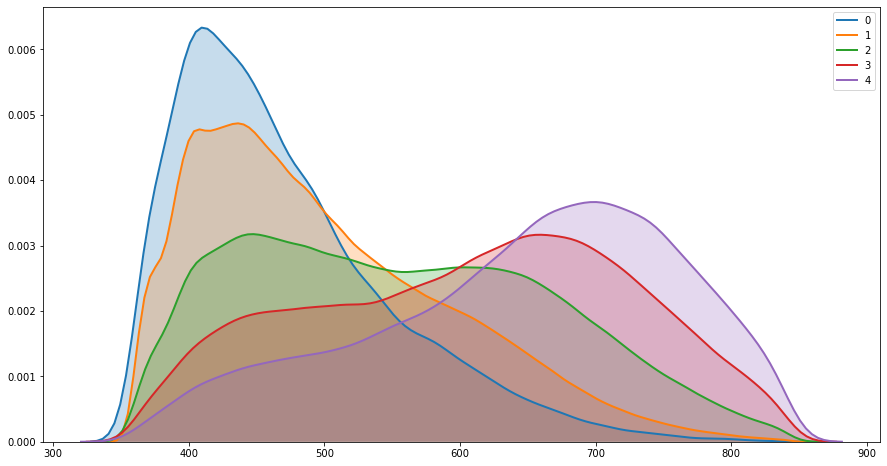

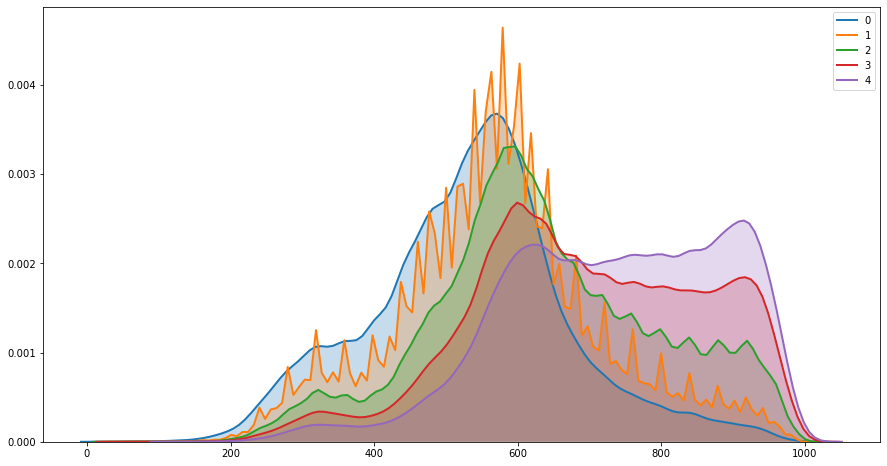

In [13]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in range(5):
        subset = data[data['Q008'] == chr(65+i)]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_banheiros"+col+".png")

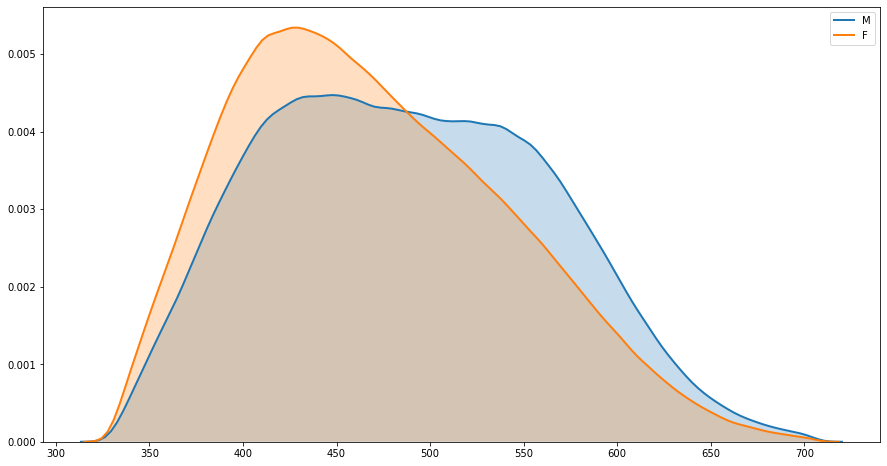

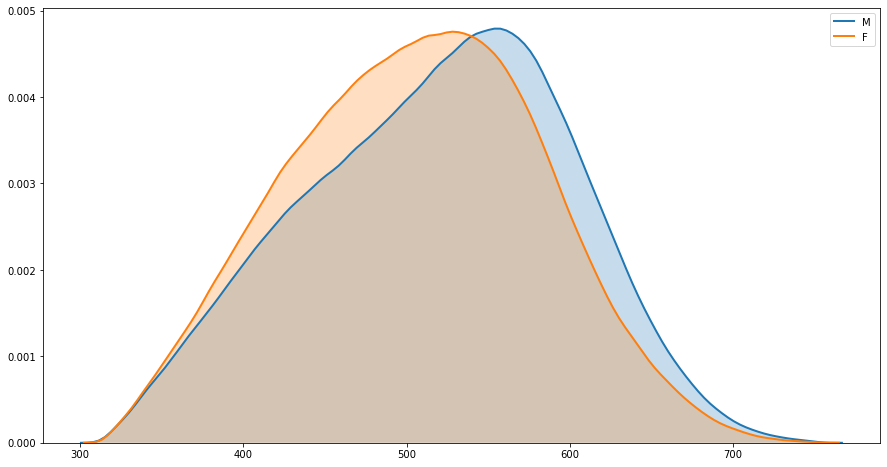

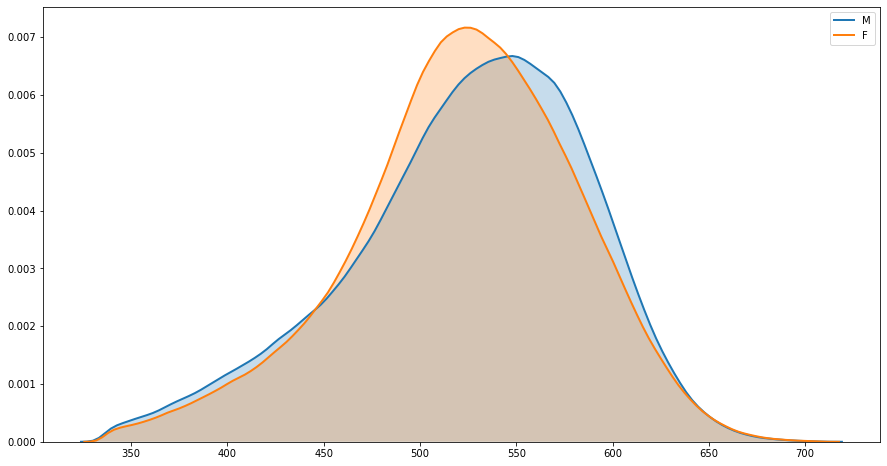

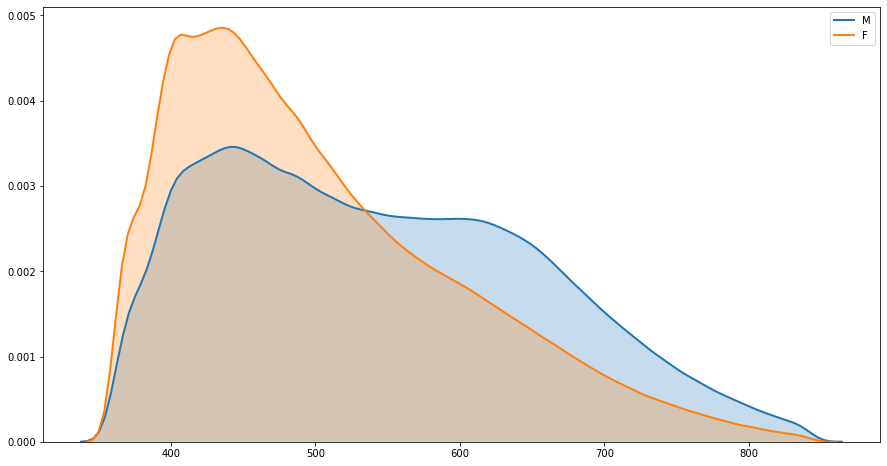

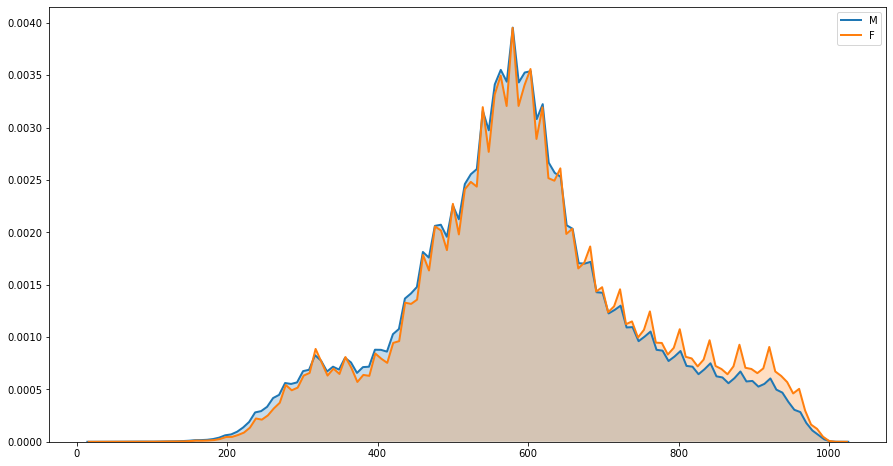

In [14]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in data["TP_SEXO"].unique():
        subset = data[data['TP_SEXO'] == i]
        sns.distplot(subset[col], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_sexo_"+col+".png")

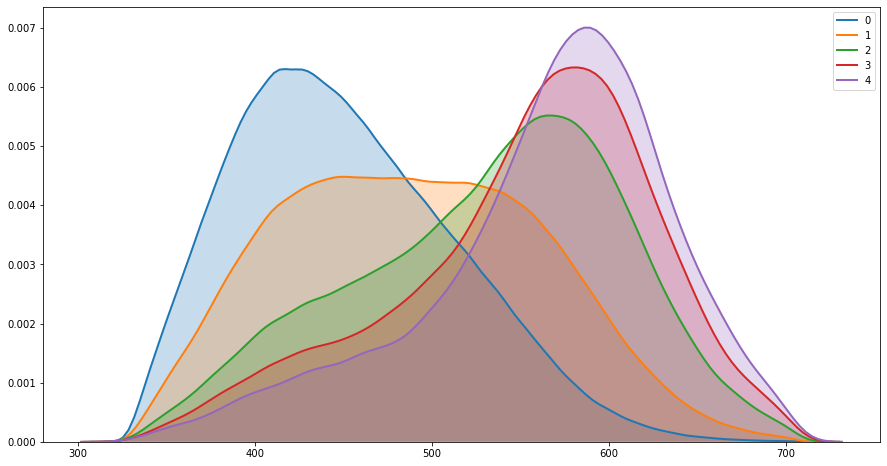

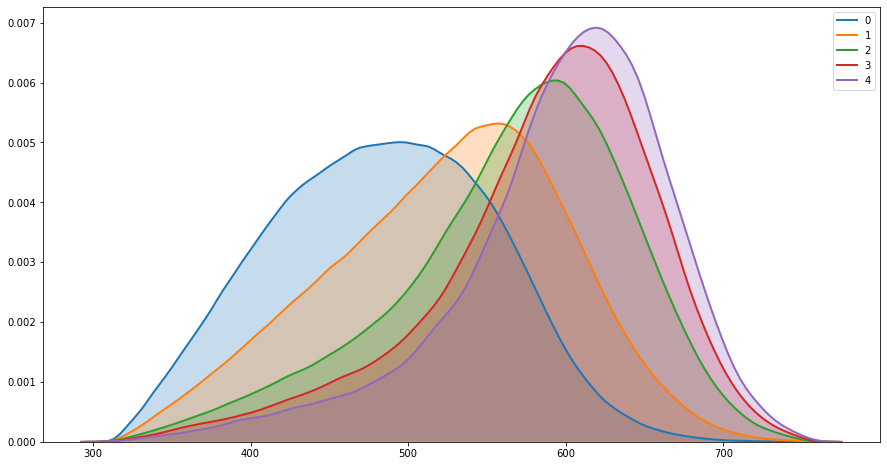

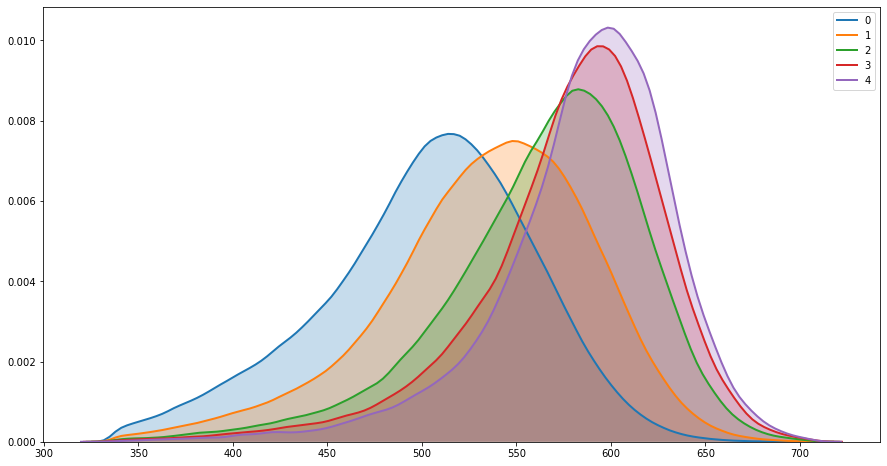

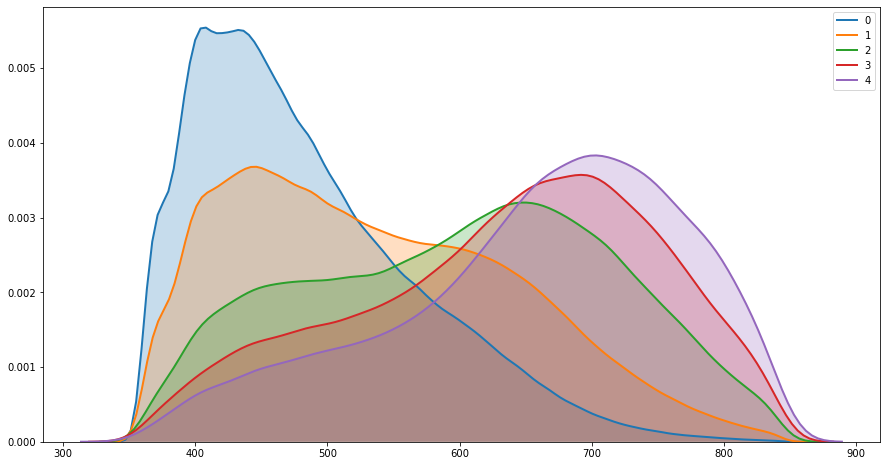

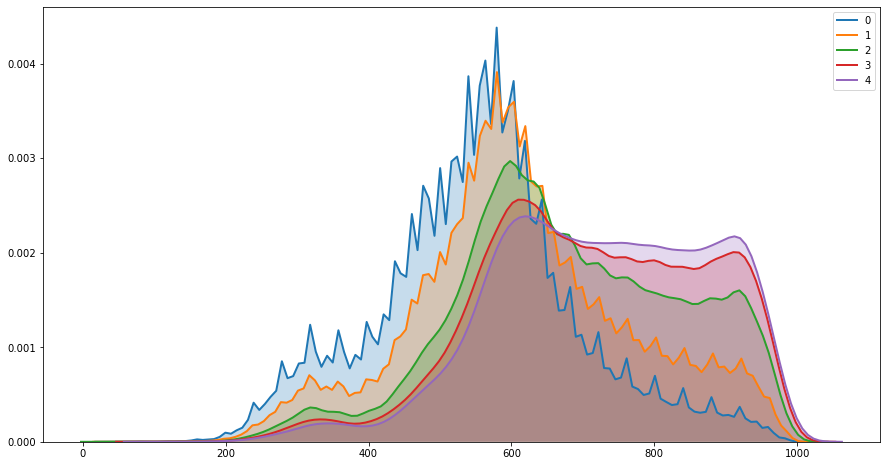

In [15]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in range(5):
        subset = data[data['Q024'] == chr(65+i)]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_computadores_"+col+".png")

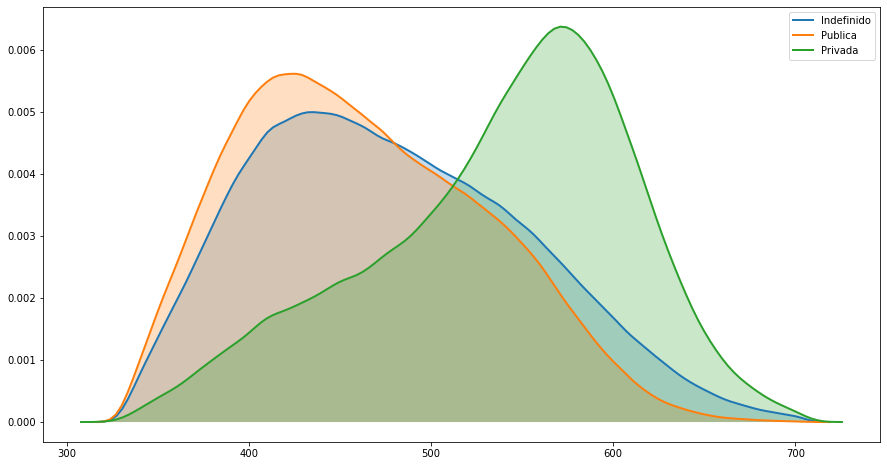

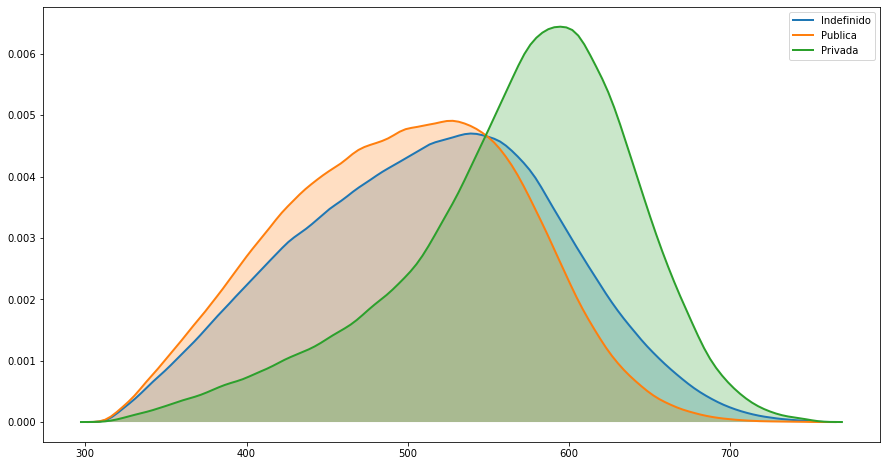

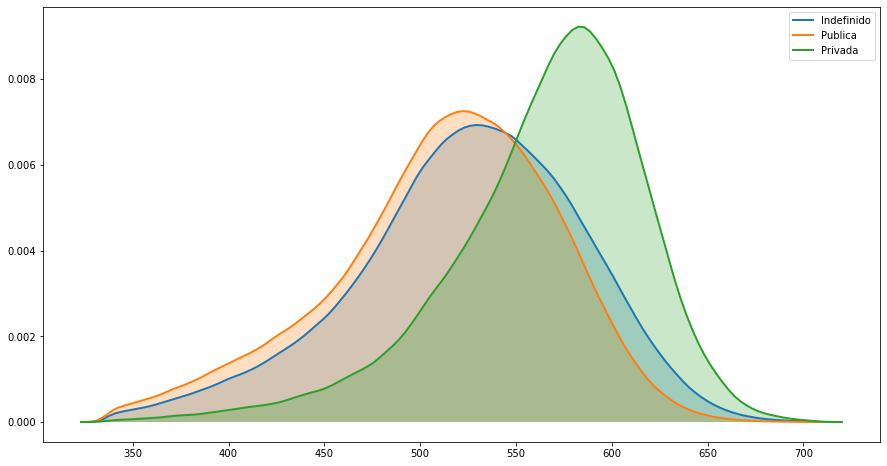

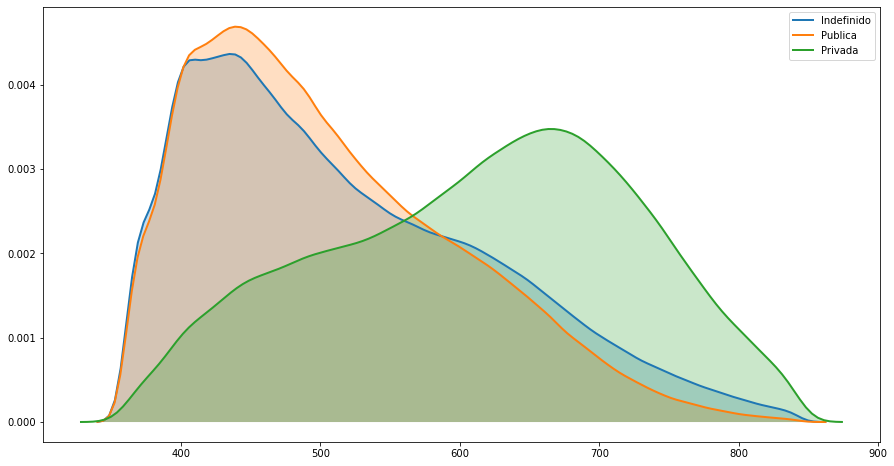

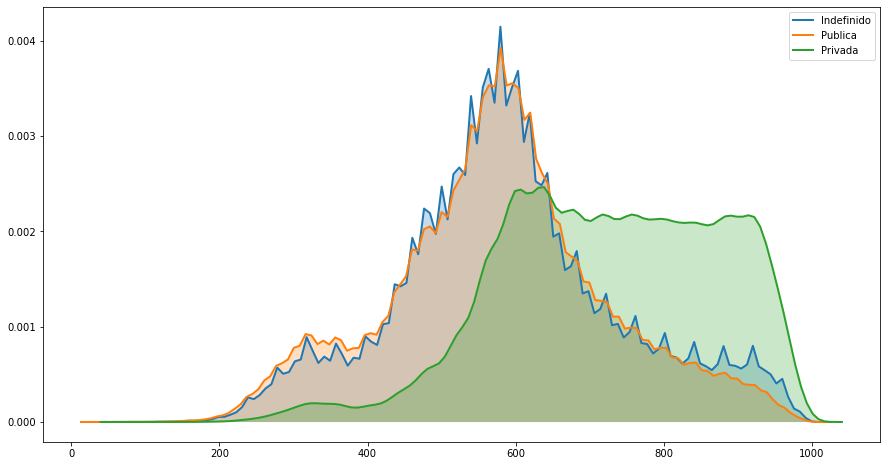

In [16]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i, label in enumerate(["Indefinido", "Publica", "Privada", "Exterior"]):
        subset = data[data['TP_ESCOLA'] == i+1]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = label)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_escola_"+col+".png")

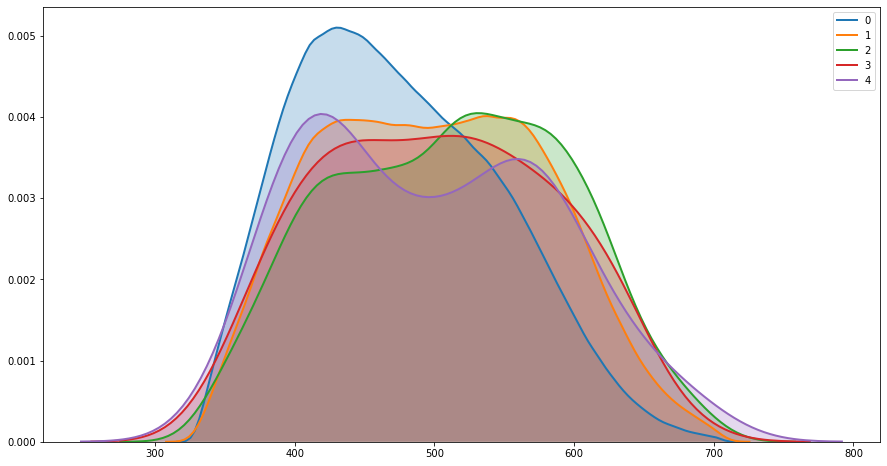

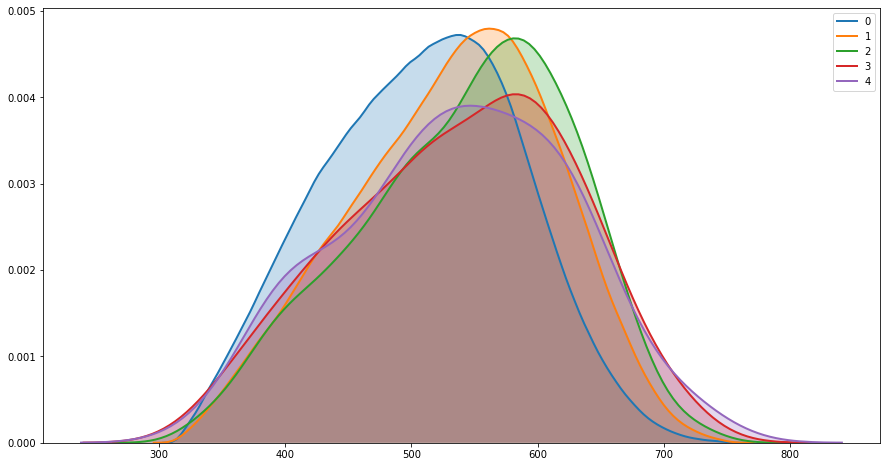

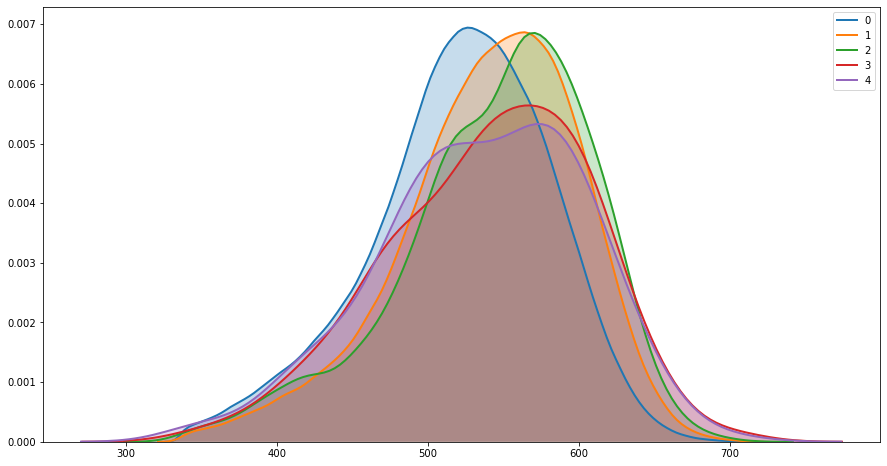

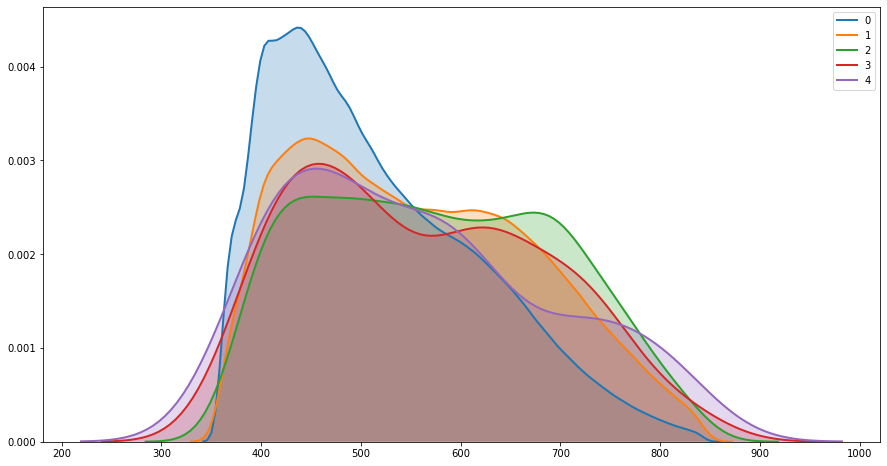

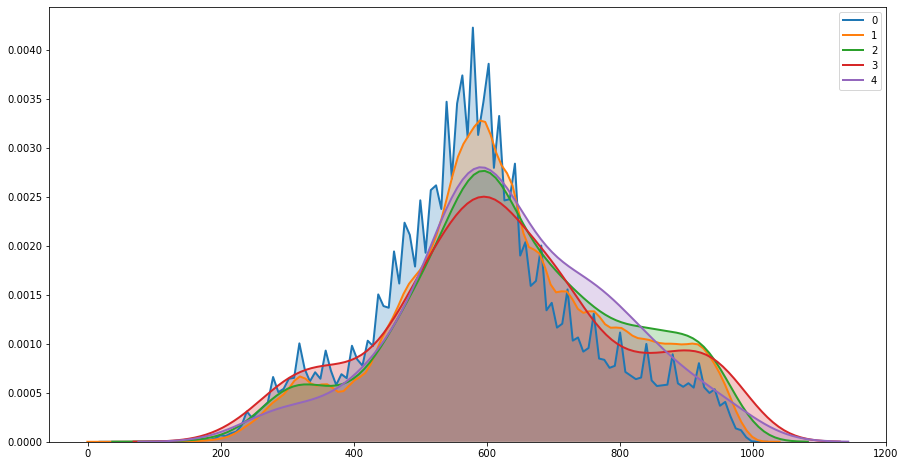

In [17]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in range(5):
        subset = data[data['Q015'] == chr(65+i)]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_seca_roupas_"+col+".png")

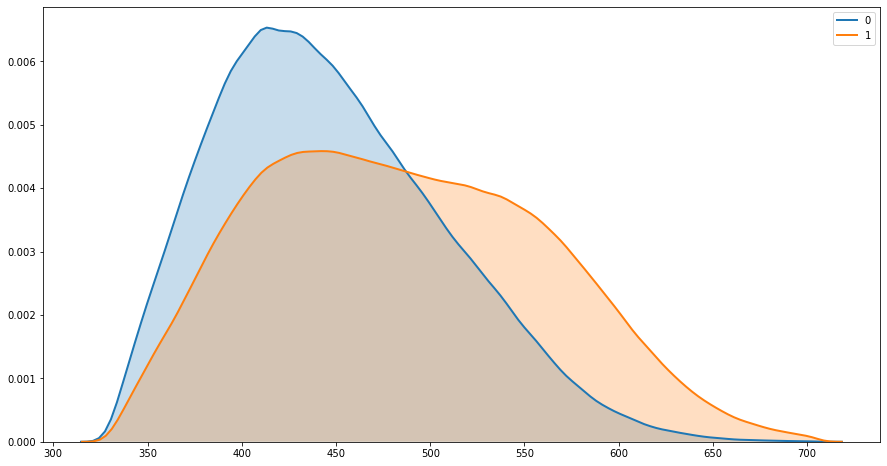

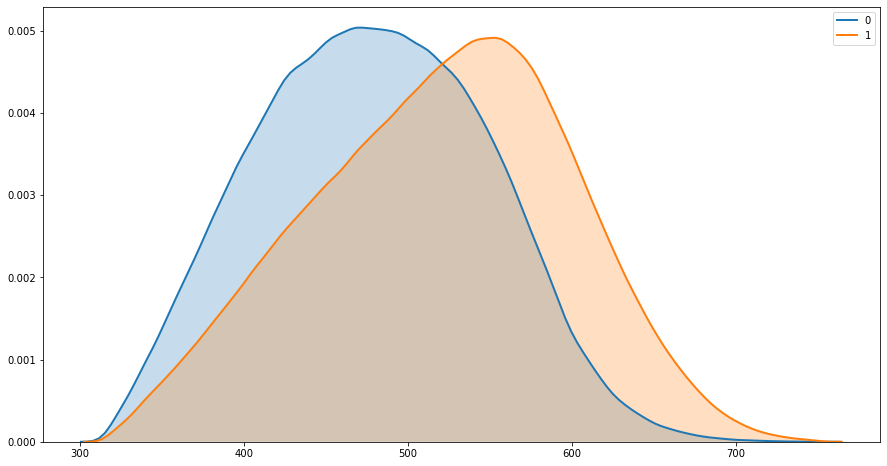

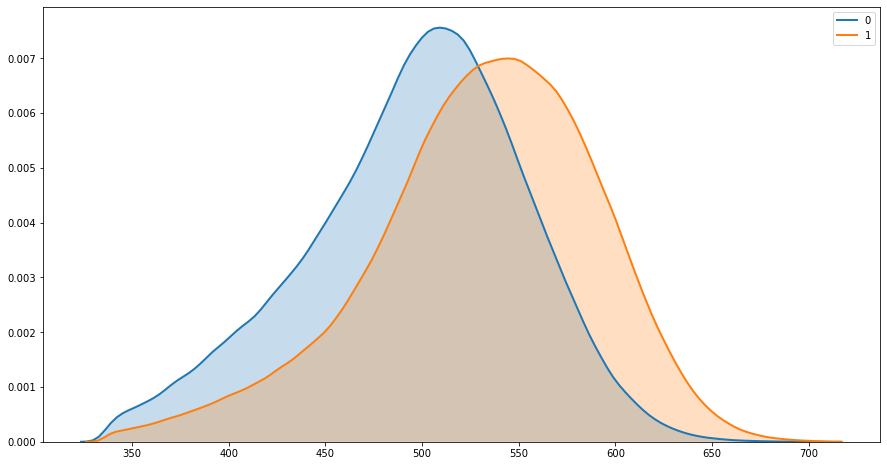

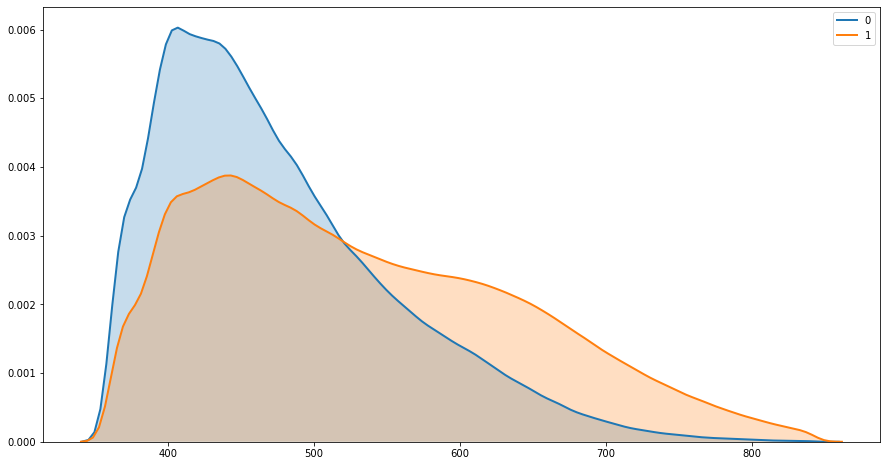

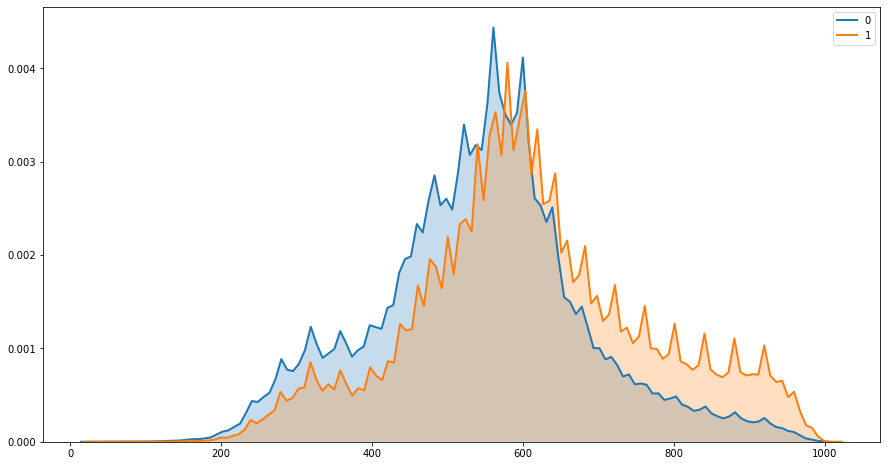

In [18]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in range(2):
        subset = data[data['Q025'] == chr(65+i)]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_wifi_"+col+".png")

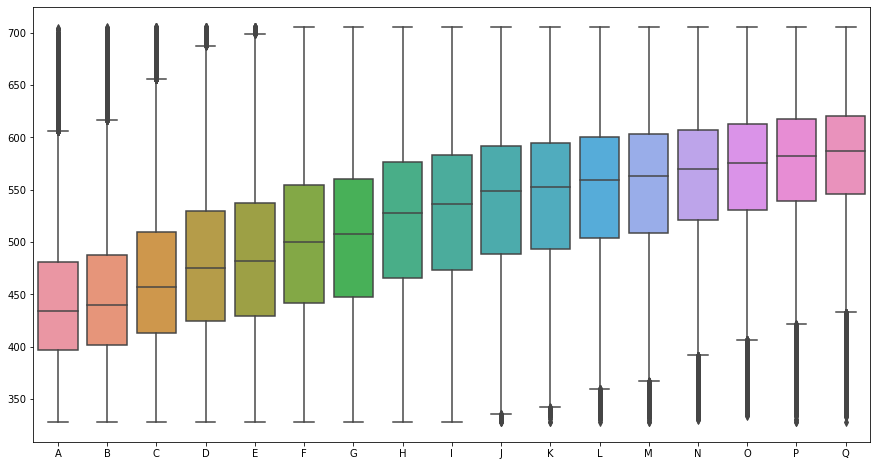

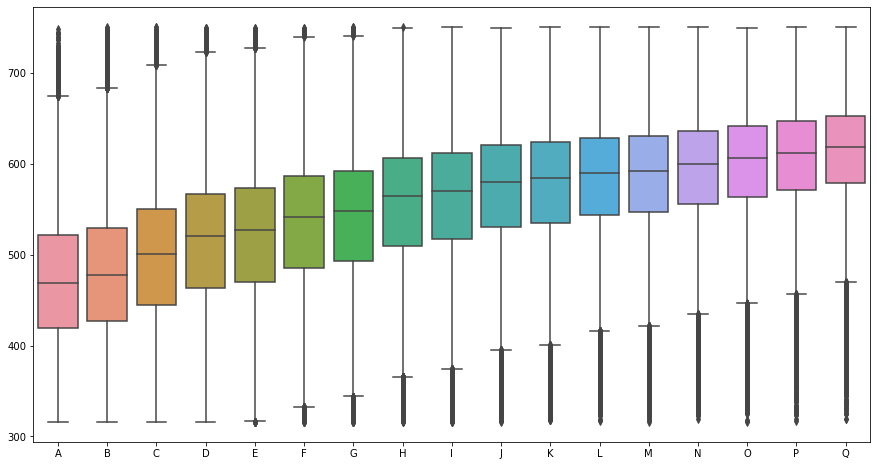

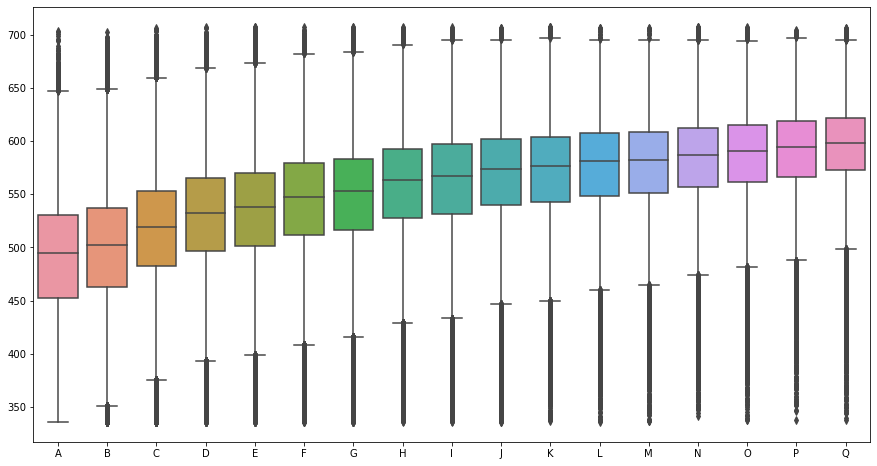

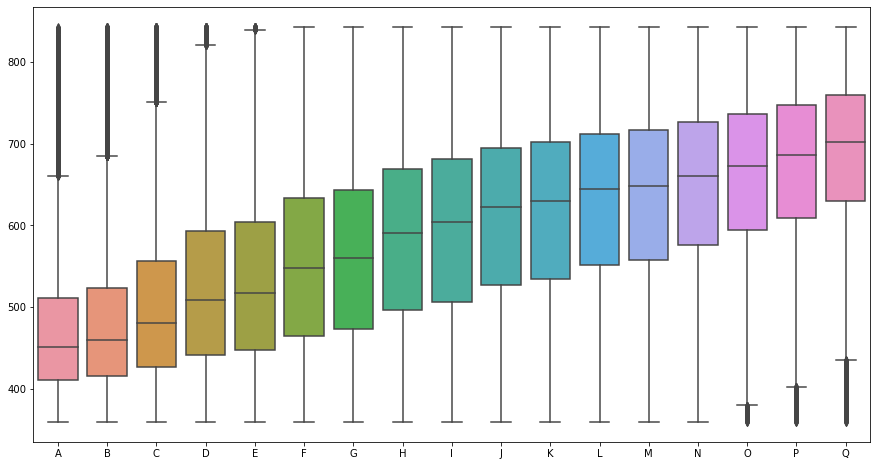

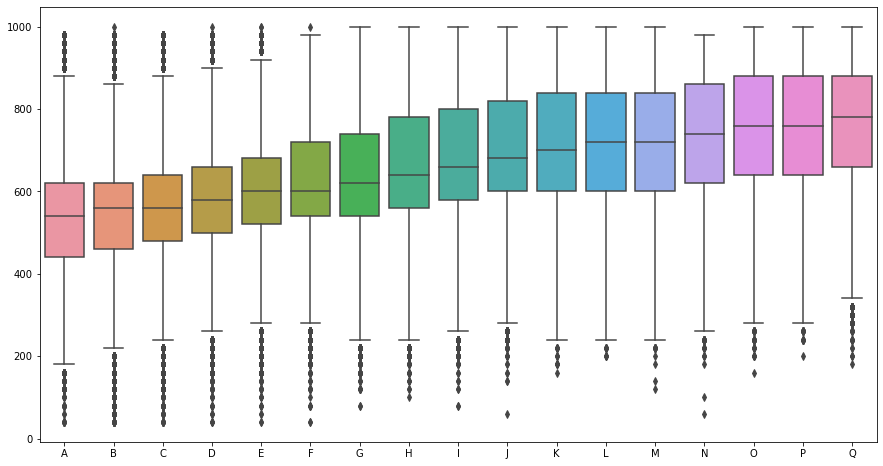

In [19]:
for col in notas:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x = data["Q006"], y = data[col], order = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"])
    plt.xlabel("")
    plt.ylabel("")
    plt.savefig("../pictures/Densidade_notas_por_renda"+col+".png")

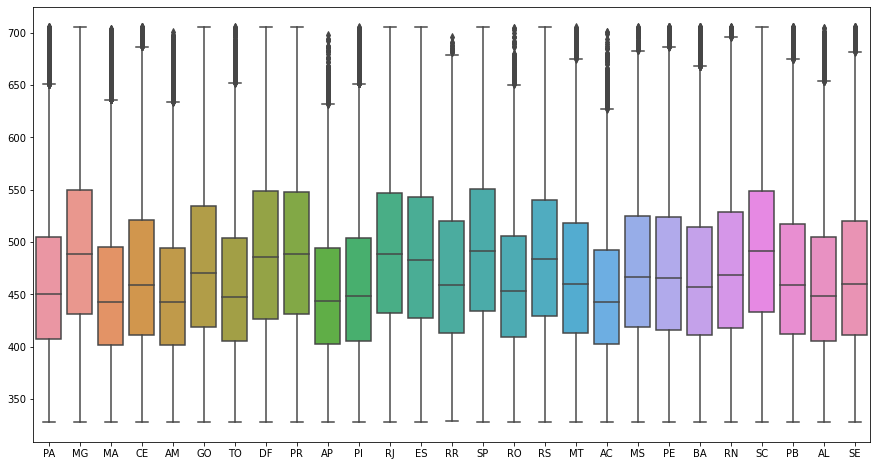

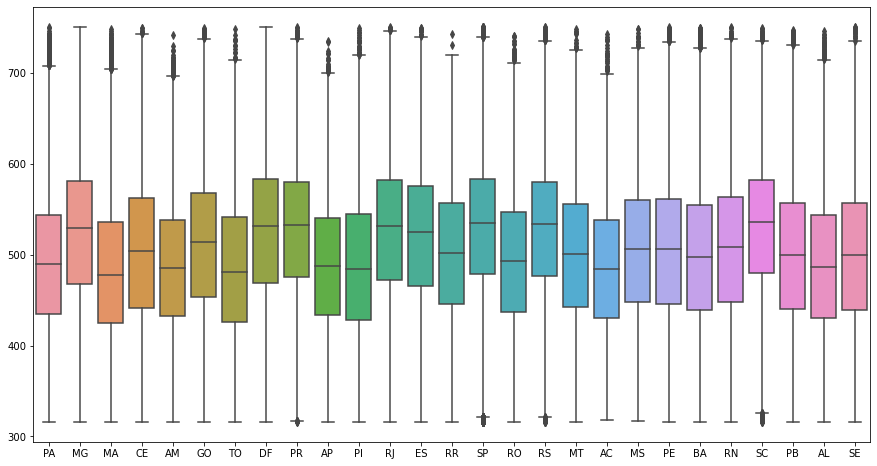

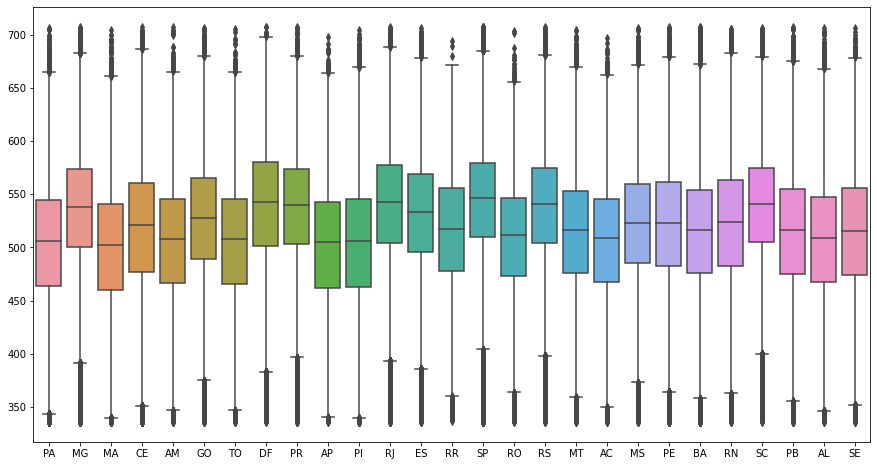

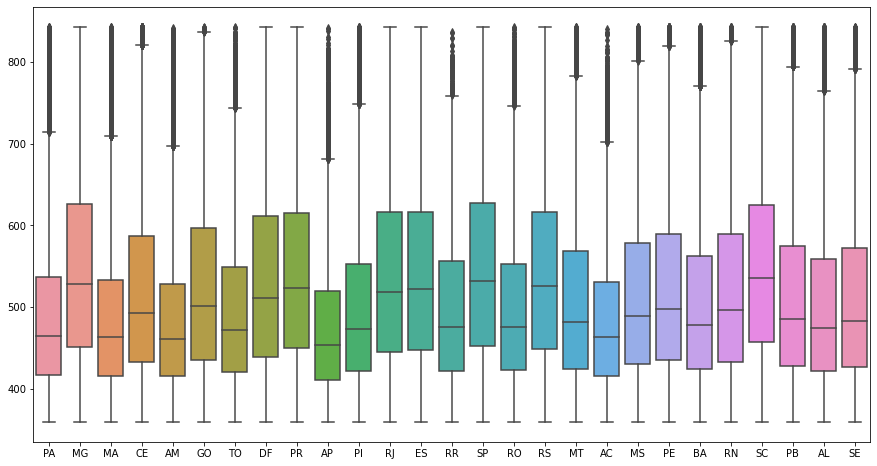

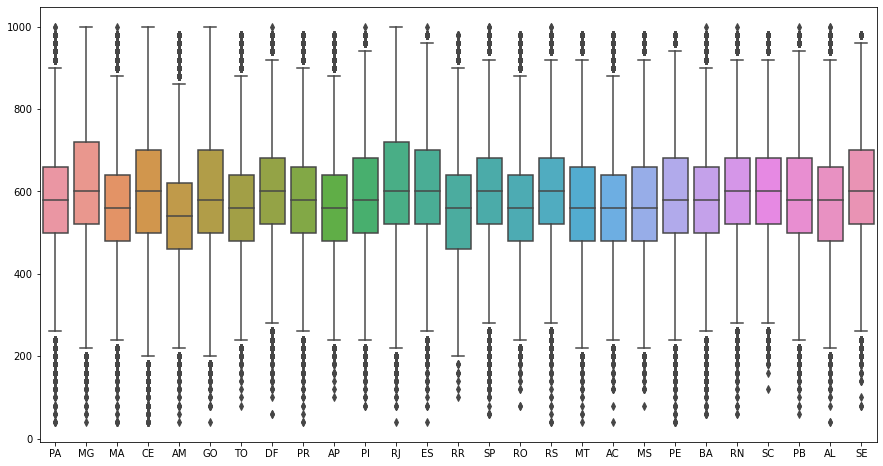

In [20]:
for col in notas:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x = data["SG_UF_RESIDENCIA"], y = data[col])
    plt.xlabel("")
    plt.ylabel("")
    plt.savefig("../pictures/Densidade_notas_por_estado"+col+".png")

### Creating variables

In [21]:
def mapea_estados(estado):
    if estado in ["AC", "AP", "AM", "PA", "RO", "RR", "TO"]:
        return "Norte"
    if estado in ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]:
        return "Nordeste"
    if estado in ["GO", "MT", "MS", "DF"]:
        return "Centro_Oeste"
    if estado in ["ES", "SP", "RJ", "MG"]:
        return "Sudeste"
    if estado in ["PR", "RS", "SC"]:
        return "Sul"
    
data["Regiao"] = data["SG_UF_RESIDENCIA"].apply(mapea_estados, 1)

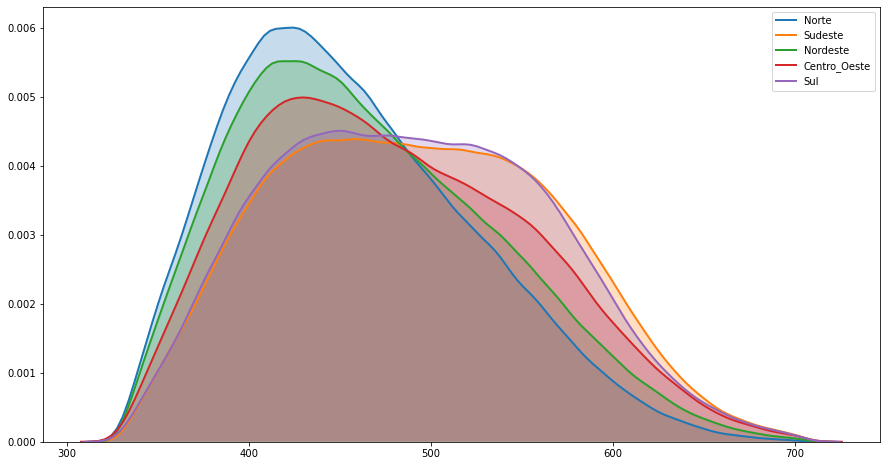

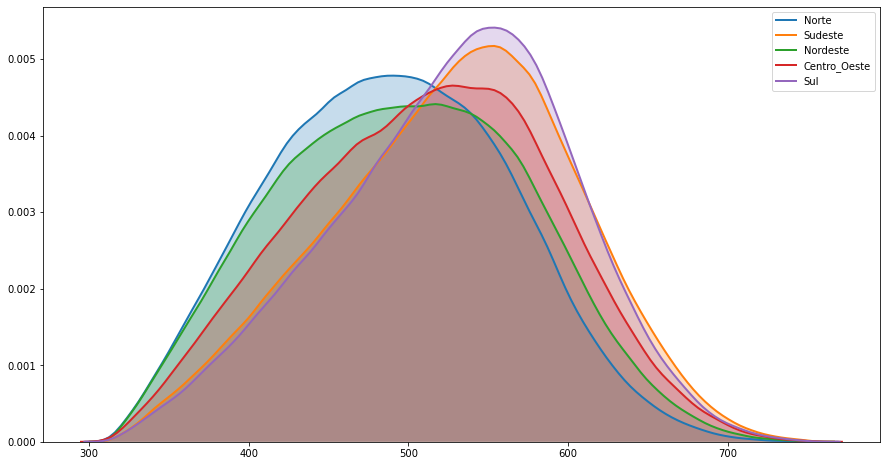

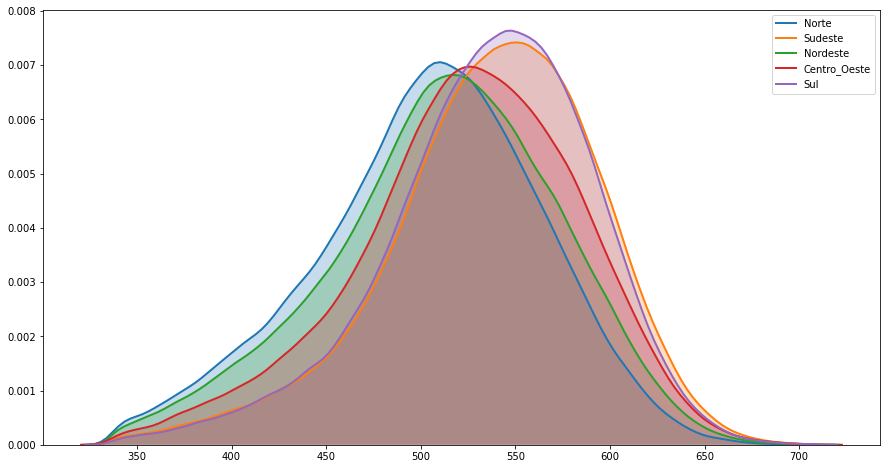

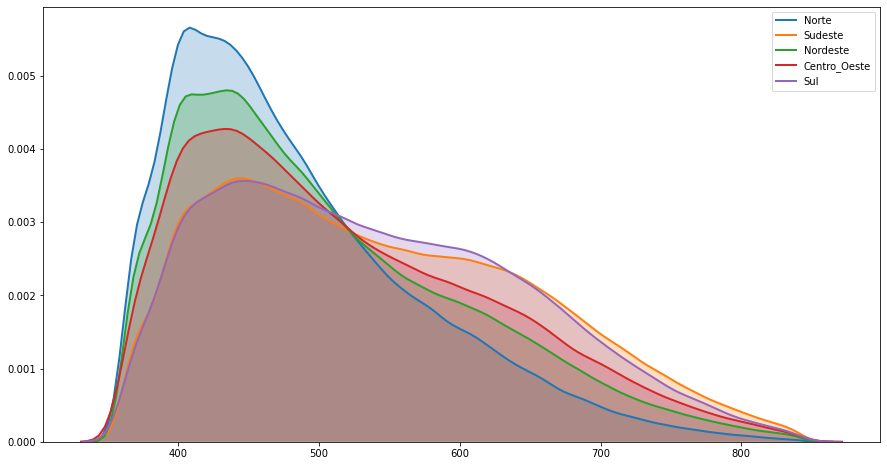

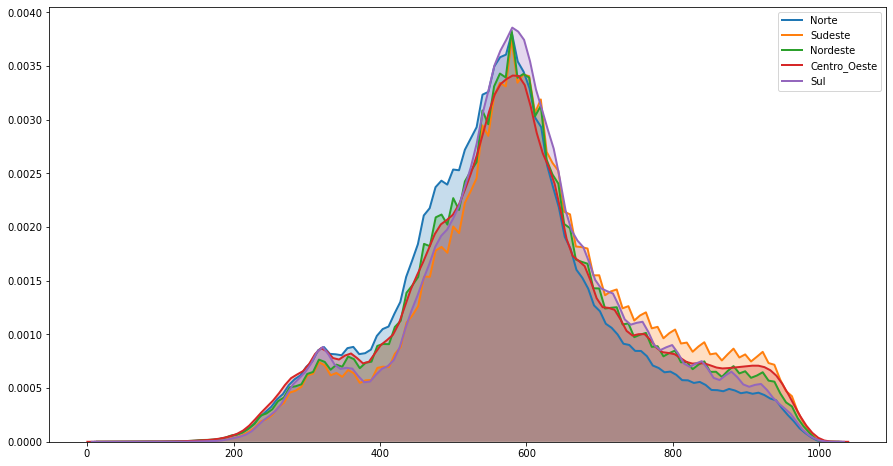

In [22]:
for col in notas:
    plt.figure(figsize=(15, 8))
    for i in data["Regiao"].unique():
        subset = data[data['Regiao'] == i]
        sns.distplot(subset[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = i)
    plt.xlabel("")
    plt.savefig("../pictures/Densidade_notas_por_regiao_"+col+".png")

### Treating variables

In [23]:
data.dtypes

NU_IDADE              int64
SG_UF_RESIDENCIA     object
TP_SEXO              object
TP_ESTADO_CIVIL       int64
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ANO_CONCLUIU       int64
TP_ESCOLA             int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_REDACAO     float64
Q001                 object
Q002                 object
Q003                 object
Q004                 object
Q005                  int64
Q006                 object
Q007                 object
Q008                 object
Q009                 object
Q010                 object
Q011                 object
Q012                 object
Q013                 object
Q014                 object
Q015                 object
Q016                 object
Q017                 object
Q018                 object
Q019                 object
Q020                 object
Q021                 object
Q022                

In [24]:
# Converting category columns to integers
numeric = notas.copy()
numeric.append("Q005")
for col in data.columns:
    if col not in numeric:
        data[col] = pd.factorize(data[col], sort = True)[0]
data.dtypes

NU_IDADE              int64
SG_UF_RESIDENCIA      int64
TP_SEXO               int64
TP_ESTADO_CIVIL       int64
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ANO_CONCLUIU       int64
TP_ESCOLA             int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_REDACAO     float64
Q001                  int64
Q002                  int64
Q003                  int64
Q004                  int64
Q005                  int64
Q006                  int64
Q007                  int64
Q008                  int64
Q009                  int64
Q010                  int64
Q011                  int64
Q012                  int64
Q013                  int64
Q014                  int64
Q015                  int64
Q016                  int64
Q017                  int64
Q018                  int64
Q019                  int64
Q020                  int64
Q021                  int64
Q022                

In [25]:
def convert(x):
    if x == 7: return -1
    else: return x

for col in ["Q001", "Q002"]:
    data[col] = data[col].apply(convert, 1)
    
def convert(x):
    if x == 5: return -1
    else: return x

for col in ["Q003", "Q004"]:
    data[col] = data[col].apply(convert, 1)

In [26]:
# Stardarizing numeric variables

mean = []
std = []
for i, col in enumerate(data.columns):
    mean.append(data[col].mean())
    std.append(data[col].std())
    data[col] = (data[col]-mean[i])/std[i]
std = pd.Series(std, index = data.columns)
mean = pd.Series(mean, index = data.columns)

std.to_csv("../dataset/std.csv", sep = ";")
mean.to_csv("../dataset/mean.csv", sep = ";")

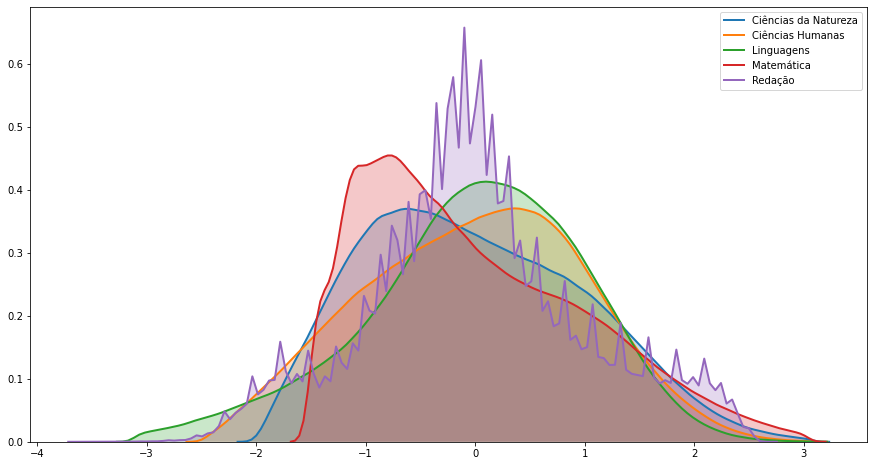

In [27]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(notas):
    sns.distplot(data[col], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = nomes[i])
plt.xlabel("")
plt.savefig("../pictures/Densidade_notas_por_disciplina_normalizado.png")

### Choosing sample size by using Kolmogorov-Smirnov test

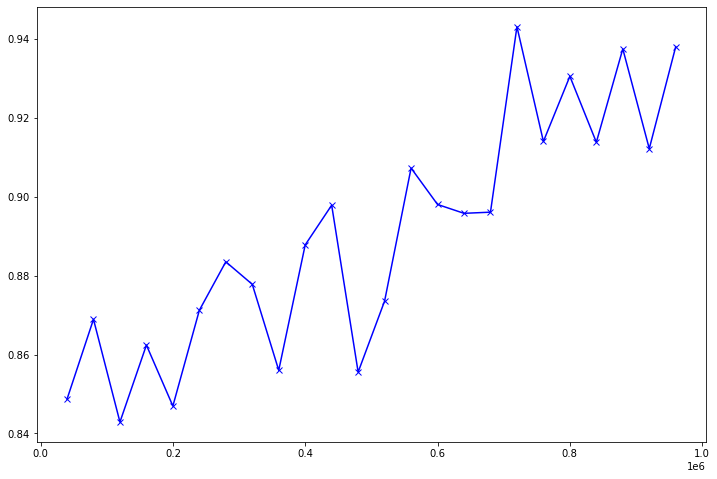

In [28]:
sizes = [size*40000 for size in range(1,25)]

p_value_array = []
for size in sizes:    
    p_value_filtered = 0
    for i in range(10):  
        sample = data.sample(size)
        p_value = 0
        for col in sample.columns:
            p_value += stats.ks_2samp(data[col], sample[col])[1]
        p_value_filtered += p_value 
    p_value_filtered = p_value_filtered/(10*len(sample.columns))
    p_value_array.append(p_value_filtered)
        
plt.figure(figsize=(12,8))
plt.plot(sizes, p_value_array, 'bx-')   
plt.xlabel('')
plt.savefig("../pictures/Amostra_teste_Kolmogorov_Smirnov.png")

### Comparing differences on mean and std according to sample size

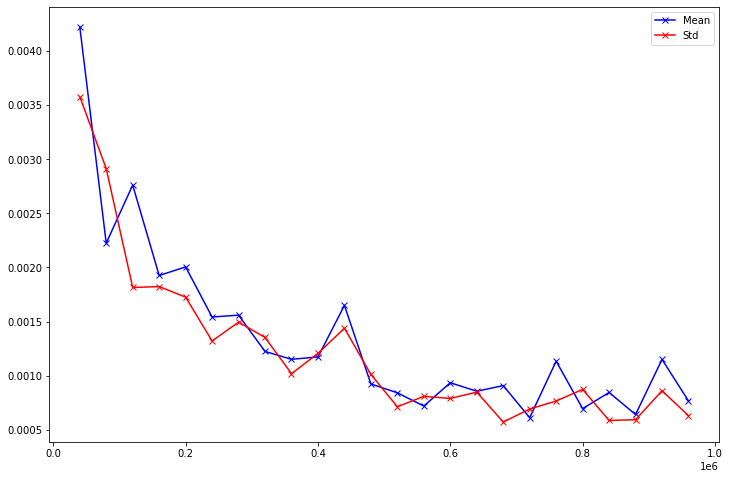

In [29]:
sizes = [size*40000 for size in range(1,25)]

mean_array = []
std_array = []
for size in sizes:
    sample = data.sample(size)
    mean_dif = 0
    std_dif = 0
    for col in sample.columns:
        mean_dif += abs(sample[col].mean() - data[col].mean())
        std_dif += abs(sample[col].std() - data[col].std())
    mean_dif = mean_dif/len(sample.columns)
    mean_array.append(mean_dif)
    std_dif = std_dif/len(sample.columns)
    std_array.append(std_dif)
    
plt.figure(figsize=(12,8))
plt.plot(sizes, mean_array, 'bx-') 
plt.plot(sizes, std_array, 'rx-')   
plt.xlabel('')
plt.legend(["Mean", "Std"])
plt.savefig("../pictures/Amostra_medias_e_desvios_padrao.png")

### Saving dataset

In [30]:
data.to_csv("../dataset/dataset_1.csv", sep = ";")

# Saving a sample data

data.sample(1000000).to_csv("../dataset/sample_1.csv", sep = ";")